# [Modeling, Data Visualization, and Conclusions Notebook] (/BavdaConsultingNLPModelingConclusions)

## Table of Contents


### - [Modeling Caution and Methodology](Modeling-Caution-and-Methodology)

### - [Stop Words & Lemmatize, Stem, and Tokenize the language.](Stop-Words-&-Lemmatize,-Stem,-Tokenize-the-language.)

### - [Pipelines, GridsearchCV, and Automated Modeling](Pipelines,-GridsearchCV,-and-Automated Modeling)

### - [Visualizations and Tables](Visualizations-and-Tables)

### - [Conclusions and Recommendations](Conclusions-and-Recommendations)


## Table of Contents
### [Modeling Caution and Methodology] (Modeling Caution and Methodology)
### [Conclusions and Recommendations] (Conclusions and Recommendations)
### [


### Imported Libraries 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
%matplotlib inline
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



### Loading Cleaned Data 

In [92]:
df = pd.read_csv('./Data/modeling.csv')

### Variables have been defined.

In [93]:
features= ['created_utc', 'text', 'num_comments', 'num_crossposts']
target=df['apple']

In [94]:
X=df[features]
y=target

### Baseline is below. The mean is used as the baseline. 53% of the posts are Google whereas Apple is 47%. If we used the mean to predict our target, we would be right 53% of the time. The goal of this model is to do better than the mean.

In [95]:
1-y.mean()

0.5319969159599075

### Summary Statistics

In [96]:
X.describe()

,created_utc,num_comments,num_crossposts
count,1.297000e+03,1297.000000,1297.0
mean,1.569593e+09,4.922899,0.0
std,9.699154e+06,29.242973,0.0
min,1.558282e+09,0.000000,0.0
25%,1.560985e+09,0.000000,0.0
50%,1.563473e+09,0.000000,0.0
75%,1.577296e+09,1.000000,0.0
max,1.628782e+09,531.000000,0.0


In [97]:
y.describe()

count    1297.000000
mean        0.468003
std         0.499168
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: apple, dtype: float64


Runs:
- **run 1 with a max 200 features and a Max Doc Fre of 20 **: 
Cross Validation scores
logreg 0.755 +- 0.053
KNN 0.649 +- 0.053
RF 0.824 +- 0.053
Log Reg
Accuracy: 0.7548188126445644
Precision: 0.7380560131795717
Recall: 0.7380560131795717
F1 Score: 0.7380560131795717
KNN
Accuracy: 0.6491904394757132
Precision: 0.6305841924398625
Recall: 0.6046128500823723
F1 Score: 0.6173254835996635
RF
Accuracy: 0.818041634541249
Precision: 0.8170940170940171
Recall: 0.7874794069192751
F1 Score: 0.802013422818792
-** run 2**- with a max feature 400 max doc frequency 200
logreg 0.746 +- 0.056
KNN 0.591 +- 0.056
RF 0.827 +- 0.056
Loogreg
Accuracy: 0.7455666923670008
Precision: 0.7187993680884676
Recall: 0.7495881383855024
F1 Score: 0.7338709677419354
KNN
Accuracy: 0.5913646877409406
Precision: 0.6230031948881789
Recall: 0.3212520593080725
F1 Score: 0.42391304347826086
RF
Accuracy: 0.8272937548188126
Precision: 0.8353765323992994
Recall: 0.785831960461285
F1 Score: 0.8098471986417657
run 300 300 max
logreg 0.749 +- 0.045
KNN 0.606 +- 0.045
RF 0.826 +- 0.045
Logreg
Accuracy: 0.7455666923670008
Precision: 0.7187993680884676
Recall: 0.7495881383855024
F1 Score: 0.7338709677419354
KNN
Accuracy: 0.6060138781804163
Precision: 0.6111111111111112
Recall: 0.43492586490939045
F1 Score: 0.5081809432146295
RF
Accuracy: 0.8234387047031612
Precision: 0.8225255972696246
Recall: 0.7940691927512356
F1 Score: 0.8080469404861694

100 max doc fr 250max features
logreg 0.756 +- 0.05
KNN 0.655 +- 0.05
RF 0.816 +- 0.05
logreg
Accuracy: 0.756360832690825
Precision: 0.7365853658536585
Recall: 0.7462932454695222
F1 Score: 0.7414075286415712
knn
Accuracy: 0.6545875096376252
Precision: 0.6044678055190539
Recall: 0.7578253706754531
F1 Score: 0.672514619883041
rf
Accuracy: 0.8211256746337703
Precision: 0.8088962108731467
Recall: 0.8088962108731467
F1 Score: 0.8088962108731467
nan
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=10, max_features=50, min_df=0.01,
                                 norm='l1', stop_words='english',
                                 strip_accents=<built-in function ascii>,
                                 sublinear_tf=True)),
                ('ss', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])
{'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'tfidf__lowercase': True, 'tfidf__max_df': 10, 'tfidf__max_features': 50, 'tfidf__min_df': 0.01, 'tfidf__norm': 'l1', 'tfidf__stop_words': 'english', 'tfidf__strip_accents': <built-in function ascii>, 'tfidf__sublinear_tf': True}


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=10, max_features=50, min_df=0.01,
                                 norm='l1', stop_words='english',
                                 strip_accents=<built-in function ascii>,
                                 sublinear_tf=True)),
                ('ss', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1'))])
{'lr__penalty': 'l1', 'tfidf__lowercase': True, 'tfidf__max_df': 10, 'tfidf__max_features': 50, 'tfidf__min_df': 0.01, 'tfidf__norm': 'l1', 'tfidf__stop_words': 'english', 'tfidf__strip_accents': <built-in function ascii>, 'tfidf__sublinear_tf': True}


nan
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(lowercase=False, max_df=10, max_features=50,
                                 min_df=0.01, norm='l1')),
                ('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=range(1, 20, 5),
                                        min_samples_leaf=range(1, 15, 5),
                                        n_estimators=25))])
{'rf__max_depth': range(1, 20, 5), 'rf__min_samples_leaf': range(1, 15, 5), 'rf__n_estimators': 25, 'tfidf__lowercase': False, 'tfidf__max_df': 10, 'tfidf__max_features': 50, 'tfidf__min_df': 0.01, 'tfidf__norm': 'l1', 'tfidf__stop_words': None, 'tfidf__strip_accents': None, 'tfidf__sublinear_tf': False}
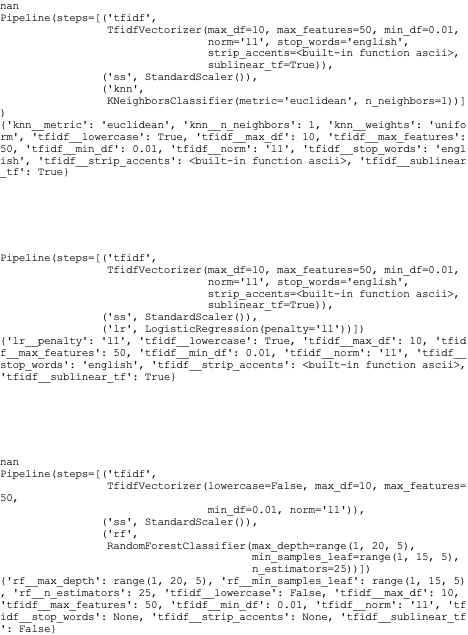
Gridsearched without removal of names
    logreg 0.914 +- 0.043
KNN 0.773 +- 0.043
RF 0.927 +- 0.043

## 

## [Stop Words & Lemmatize, Stem, and Tokenize the language.](Stop-Words-&-Lemmatize,-Stem,-Tokenize-the-language.)

In [98]:
ps=PorterStemmer()
df.text=df.text.apply(lambda x : ' '.join([ps.stem(w) for w in word_tokenize(x)]))

In [99]:
df.text

0       appl wi-fi rumor . so a while back i heard app...
1       have anyon notic a massiv drop off in support ...
2       appl is n't listen so i thought i 'd just tri ...
3       upgrad oper system messag . hello , i am a stu...
4       for anyon who recent got a logic board replac ...
                              ...                        
1292    googl timelin issu . for mani month timelin ha...
1293    bill and hillari clinton . i hope i live long ...
1294    safesearch broken . [ http : //support.google....
1295    help me make a list of `` flip-a-switch '' fea...
1296    need help ( softwar engin ) . hi , my name is ...
Name: text, Length: 1297, dtype: object

In [100]:
tfidf= TfidfVectorizer(strip_accents=ascii, lowercase = True,
                       stop_words='english', max_df=100.0,
                        min_df=.01, max_features=250, 
                       norm='l1', sublinear_tf=True) 
tfidf.fit(df.text)
dft= pd.DataFrame(tfidf.transform(df.text).todense(), columns =tfidf.get_feature_names())

In [101]:
df['text'][50]

'wa i hack ? if so , what do i do ? . i ’ m sorri if the flair or the post don ’ t belong here , but i dunno where to go instead . i got an email today say that my appl id wa use to sign into a complet unrecogn iphon 6 somewher . i don ’ t think it ’ s a scam email , and it fit with anoth email i got from googl say that someon tri to access my account from malaysia but it wa block . i don ’ t think i have ani credit card detail or anyth on thi account , but what should i do from here ?'

In [102]:
df['num_crossposts'].unique()

array([0])

In [103]:
dft.columns[0:100]

Index(['10', '11', '13', '2019', 'abl', 'access', 'account', 'actual', 'ad',
       'add', 'ago', 'airpod', 'allow', 'alreadi', 'alway', 'amp', 'android',
       'ani', 'anoth', 'anyon', 'anyth', 'app', 'appl', 'apple', 'ask',
       'assist', 'bar', 'batteri', 'becaus', 'befor', 'best', 'better', 'bit',
       'bought', 'button', 'buy', 'ca', 'calendar', 'card', 'case', 'chang',
       'charg', 'check', 'chrome', 'click', 'code', 'com', 'come', 'compani',
       'complet', 'comput', 'connect', 'contact', 'creat', 'current', 'custom',
       'data', 'day', 'delet', 'design', 'develop', 'devic', 'did', 'differ',
       'display', 'doe', 'don', 'download', 'drive', 'els', 'email', 'end',
       'everi', 'everyth', 'experi', 'famili', 'featur', 'feel', 'file', 'fix',
       'game', 'gmail', 'good', 'googl', 'google', 'got', 'great', 'guy', 'ha',
       'happen', 'help', 'hey', 'hi', 'home', 'hope', 'hour', 'howev', 'http',
       'icloud', 'id'],
      dtype='object')

In [104]:
dft.columns[101:200]

Index(['imag', 'includ', 'inform', 'instead', 'io', 'ipad', 'iphon', 'issu',
       'just', 'keyboard', 'know', 'laptop', 'left', 'let', 'life', 'like',
       'link', 'list', 'll', 'locat', 'long', 'look', 'lot', 'mac', 'macbook',
       'make', 'mani', 'map', 'mbp', 'messag', 'mode', 'model', 'money',
       'month', 'music', 'need', 'new', 'news', 'noth', 'notic', 'notif',
       'number', 'offer', 'old', 'onli', 'onlin', 'open', 'option', 'order',
       'page', 'password', 'pay', 'peopl', 'person', 'phone', 'photo', 'pixel',
       'place', 'play', 'pleas', 'plu', 'point', 'possibl', 'post', 'pro',
       'problem', 'product', 'purchas', 'question', 'read', 'realli', 'reason',
       'receiv', 'recent', 'redd', 'releas', 'remov', 'repair', 'replac',
       'result', 'return', 'right', 'run', 'said', 'save', 'say', 'screen',
       'search', 'send', 'sent', 'servic', 'set', 'share', 'sinc', 'site',
       'someon', 'someth', 'start', 'stop'],
      dtype='object')

In [105]:
dft.columns[201:300]

Index(['store', 'suggest', 'support', 'sure', 'switch', 'talk', 'tell', 'text',
       'thank', 'thi', 'thing', 'think', 'thought', 'time', 'today', 'told',
       'track', 'tri', 'turn', 'type', 'u2019', 'u201c', 'u201d', 'updat',
       'upgrad', 'usb', 'use', 'user', 've', 'veri', 'version', 'video', 'wa',
       'wait', 'want', 'watch', 'way', 'websit', 'week', 'went', 'whi',
       'window', 'wonder', 'work', 'wrong', 'www', 'x200b', 'year', 'youtub'],
      dtype='object')

In [125]:
dft=dft.drop(['airpod', 'android', 'appl', 'apple', 'chrome','gmail', 'googl', 'google', 'icloud', 'ipad','iphon',\
'macbook', 'mac', 'iphon', 'pixel', 'youtub'], axis=1)


KeyError: "['airpod' 'android' 'appl' 'apple' 'chrome' 'gmail' 'googl' 'google'\n 'icloud' 'ipad' 'iphon' 'macbook' 'mac' 'iphon' 'pixel' 'youtub'] not found in axis"

In [108]:
dft['num_comments'] = df.num_comments

In [109]:
XX=dft

In [110]:
#standard scaler
XXX=StandardScaler().fit_transform(XX)

In [111]:
#init
lr=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
rf=RandomForestClassifier(n_estimators=25, n_jobs=-1)


In [112]:
#Cross val
lr_scores = cross_val_score(lr, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
knn_scores=cross_val_score(knn, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rf_scores=cross_val_score(rf, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

print('logreg', round (lr_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('KNN', round (knn_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))

logreg 0.756 +- 0.05
KNN 0.655 +- 0.05
RF 0.816 +- 0.05


In [247]:
#dft.value_counts().sort_values()

In [42]:
dft=dft.drop(['iphon', 'macbook', 'mac', 'iphon', 'googl', 'appl', 'airpod'], axis=1)
#'youtub', airpod', 'android', 'appl', 'apple', 'gmail', 'googl', 'google', 'icloud', 'ipad', 'iphon', 'mac',\
#'macbook', 'pixel'

In [113]:
lrpredictions= cross_val_predict(lr, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
knnpredictions= cross_val_predict(knn, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rfpredictions= cross_val_predict(rf, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

In [231]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr

Text(0.5, 257.44, 'Predicted label')

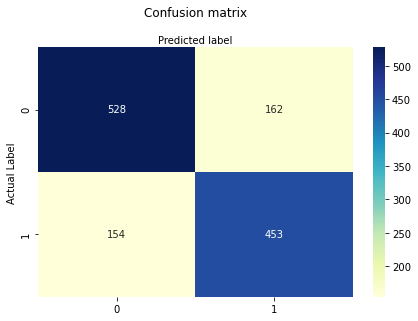

In [115]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [116]:
print("Accuracy:",metrics.accuracy_score(y, lrpredictions))
print("Precision:",metrics.precision_score(y, lrpredictions))
print("Recall:",metrics.recall_score(y, lrpredictions))
print("F1 Score:", metrics.f1_score(y, lrpredictions))

Accuracy: 0.756360832690825
Precision: 0.7365853658536585
Recall: 0.7462932454695222
F1 Score: 0.7414075286415712


In [117]:
cnf_matrix_knn=metrics.confusion_matrix(y, knnpredictions)
cnf_matrix_knn

array([[389, 301],
       [147, 460]])

Text(0.5, 257.44, 'Predicted label')

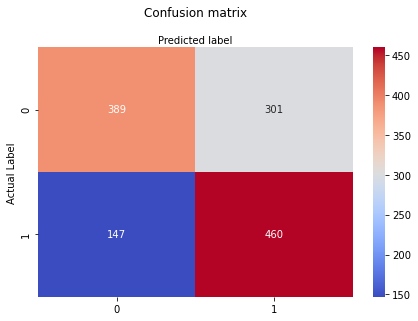

In [118]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [119]:
print("Accuracy:",metrics.accuracy_score(y, knnpredictions))
print("Precision:",metrics.precision_score(y, knnpredictions))
print("Recall:",metrics.recall_score(y, knnpredictions))
print("F1 Score:", metrics.f1_score(y, knnpredictions))

Accuracy: 0.6545875096376252
Precision: 0.6044678055190539
Recall: 0.7578253706754531
F1 Score: 0.672514619883041


In [114]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr

array([[528, 162],
       [154, 453]])

In [122]:
cnf_matrix_rf=metrics.confusion_matrix(y, rfpredictions)
cnf_matrix_rf

array([[574, 116],
       [116, 491]])

Text(0.5, 257.44, 'Predicted label')

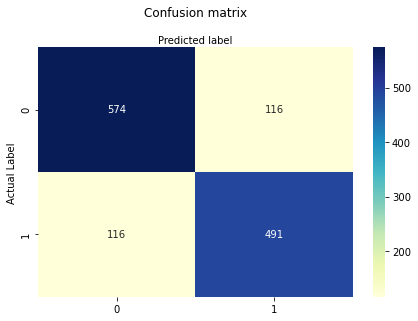

In [123]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [124]:
print("Accuracy:",metrics.accuracy_score(y, rfpredictions))
print("Precision:",metrics.precision_score(y, rfpredictions))
print("Recall:",metrics.recall_score(y, rfpredictions))
print("F1 Score:", metrics.f1_score(y, rfpredictions))

Accuracy: 0.8211256746337703
Precision: 0.8088962108731467
Recall: 0.8088962108731467
F1 Score: 0.8088962108731467


In [51]:
# tell spaCy to use the english language
nlp = spacy.load('en_core_web_sm')
# add sentiment analysis to your pipeline
nlp.add_pipe("spacytextblob")

In [52]:
df['polarity']=[nlp(word)._.polarity for word in df['text']]

In [53]:
df['subjectivity']=[nlp(word)._.subjectivity for word in df['text']]

In [54]:
df['assessment']=[nlp(word)._.assessments for word in df['text']]

In [55]:
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))

RF 0.779 +- 0.059


Apple Mean Polarity:
0.093
Apple Median Polarity:
0.067


(None, None, None, None, <AxesSubplot:>)

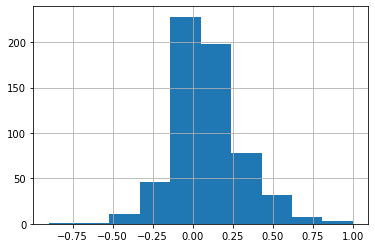

In [86]:
print('Apple Mean Polarity:'), print(round(df['polarity'][0:606].mean(), 3)), print('Apple Median Polarity:'), print(round(df['polarity'][0:606].median(), 3)), df['polarity'][0:606].hist()

Google Mean Polarity
0.05
Google Median Polarity
0.0


(None, None, None, None, <AxesSubplot:>)

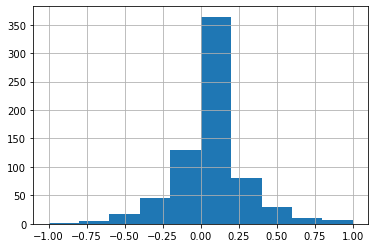

In [85]:
print('Google Mean Polarity'), print(round(df['polarity'][607:1297].mean(), 3)), print('Google Median Polarity'), print(round(df['polarity'][607:1297].median(), 3)), df['polarity'][607:1297].hist()

(0.38307911761061136, 0.4056210602263233, <AxesSubplot:>)

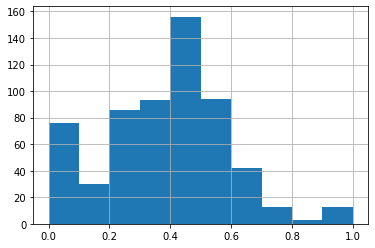

In [339]:
df['subjectivity'][0:606].mean(), df['subjectivity'][0:606].median(), df['subjectivity'][0:606].hist()

(0.36707887357085267, 0.38867653810835623, <AxesSubplot:>)

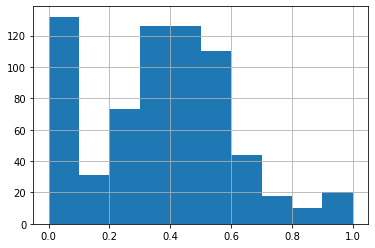

In [340]:
df['subjectivity'][607:1297].mean(), df['subjectivity'][607:1297].median(), df['subjectivity'][607:1297].hist()

(apple
 0    0.367079
 1    0.383323
 Name: subjectivity, dtype: float64,
 apple
 0    0.388677
 1    0.405921
 Name: subjectivity, dtype: float64,
 apple
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
 Name: subjectivity, dtype: object)

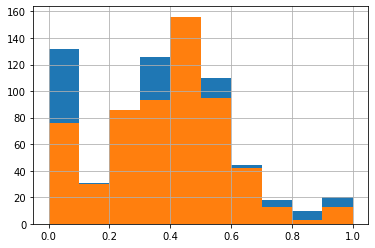

In [349]:
df.groupby(['apple'])['subjectivity'].mean(), df.groupby(['apple'])['subjectivity'].median(), df.groupby(['apple'])['subjectivity'].hist()

(apple
 0    0.051353
 1    0.092909
 Name: polarity, dtype: float64,
 apple
 0    0.000000
 1    0.066667
 Name: polarity, dtype: float64,
 apple
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
 Name: polarity, dtype: object)

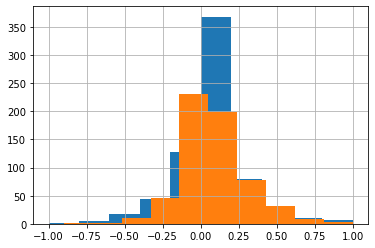

In [350]:
df.groupby(['apple'])['polarity'].mean(), df.groupby(['apple'])['polarity'].median(), df.groupby(['apple'])['polarity'].hist()

## Piping and Gridsearch automation were used.

### This is where the parameters were created for each of the three models.

In [17]:
params1={'tfidf__strip_accents':[ascii], 'tfidf__lowercase':[True],\
         
'tfidf__stop_words':['english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\

'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 250, 300, 350],\

'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[True], 'lr__penalty':['l1', 'l2']}


params2={'tfidf__strip_accents':[ascii], 'tfidf__lowercase':[True],\
         
'tfidf__stop_words':['english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\
         
'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 200, 300, 350],\
         
'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[True], 'knn__n_neighbors':range(1, 51, 10), \
         
'knn__weights':['uniform', 'distance'], 'knn__metric':['euclidean','manhattan']}


params3={'tfidf__strip_accents':[None, ascii], 'tfidf__lowercase':[False, True],\
         
'tfidf__stop_words':[None, 'english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\
         
'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 250, 300, 350],\
         
'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[False, True], 'rf__max_depth': [range(1,20, 5)],\

'rf__min_samples_leaf':[range(1,15, 5)], 'rf__n_estimators':[25, 50, 100, 200]}


Apple Mean Polarity:
0.093
Apple Median Polarity:
0.067


(None, None, None, None, <AxesSubplot:>)

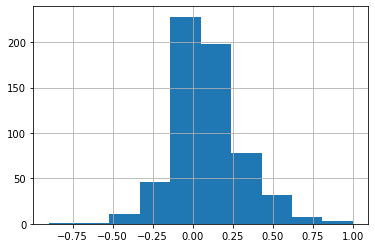

In [75]:
print('Apple Mean Polarity:'), print(round(df['polarity'][0:606].mean(), 3)), print('Apple Median Polarity:'), print(round(df['polarity'][0:606].median(), 3)), df['polarity'][0:606].hist()

## [Pipelines, GridsearchCV, and Automated Modeling](Pipelines, GridsearchCV, and Automated Modeling)
### The Pipelines are instantiated, and the GridsearchCV is run. Parameters had to be reduced to prevent a crash of the notebook.

In [19]:
pipelr=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('lr', LogisticRegression())])
pipeknn=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('knn', KNeighborsClassifier())])
piperf=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('rf', RandomForestClassifier())])

In [87]:
#pipelrgrid=GridSearchCV(pipelr, param_grid=params1, cv=5)
#pipelrgrid.fit(X,y)

In [21]:
#print(pipelrgrid.best_score_)
#print(pipelrgrid.best_estimator_)
#print(pipelrgrid.best_params_)

nan
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=10, max_features=50, min_df=0.01,
                                 norm='l1', stop_words='english',
                                 strip_accents=<built-in function ascii>,
                                 sublinear_tf=True)),
                ('ss', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1'))])
{'lr__penalty': 'l1', 'tfidf__lowercase': True, 'tfidf__max_df': 10, 'tfidf__max_features': 50, 'tfidf__min_df': 0.01, 'tfidf__norm': 'l1', 'tfidf__stop_words': 'english', 'tfidf__strip_accents': <built-in function ascii>, 'tfidf__sublinear_tf': True}


In [89]:
#pipeknngrid=GridSearchCV(pipeknn, param_grid=params2, cv=5)
#pipeknngrid.fit(X,y)

In [88]:
#print(pipeknngrid.best_score_)
#print(pipeknngrid.best_estimator_)
#print(pipeknngrid.best_params_)

In [ ]:
#piperfgrid=GridSearchCV(piperf, param_grid=params3, cv=5)
#piperfgrid.fit(X,y)

In [ ]:
#print(piperfgrid.best_score_)
#print(piperfgrid.best_estimator_)
#print(piperfgrid.best_params_)

## [Conclusions and Recommendations] (Conclusions and Recommendations)
As

[1, 11, 21, 31, 41]